# Compte rendu projet numérique de mathématiques

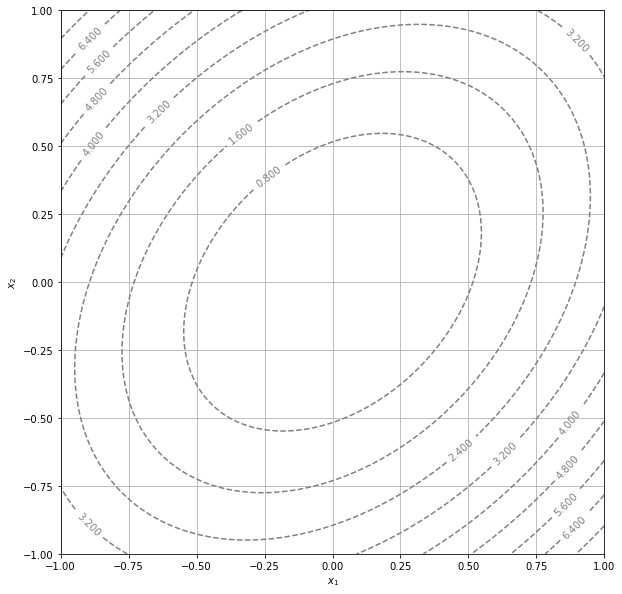

In [6]:
#Prémilinaires
# Third-Party Libraries
# ---------------------

# Autograd & Numpy
import autograd
import autograd.numpy as np

# Pandas
import pandas as pd

# Matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 10] # [width, height] (inches). 

# Jupyter & IPython
from IPython.display import display


def grad(f):
    g = autograd.grad
    def grad_f(x, y):
        return np.array([g(f, 0)(x, y), g(f, 1)(x, y)])
    return grad_f


def J(f):
    j = autograd.jacobian
    def J_f(x, y):
        return np.array([j(f, 0)(x, y), j(f, 1)(x, y)]).T
    return J_f

def f(x, y):
    return np.sin(x) + 2.0 * np.sin(y)

grad_f = grad(f)

grad_f(0.0, 0.0) # array([1., 2.])

def f(x, y):
    return np.array([x + 2 * y, 3 * x + 4 * y])

J_f = J(f)

J_f(0.0, 0.0) # array([[1., 2.], [3., 4.]])

def display_contour(f, x, y, levels):
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)
    fig, ax = plt.subplots()
    contour_set = plt.contour(
        X, Y, Z, colors="grey", linestyles="dashed", 
        levels=levels 
    )
    ax.clabel(contour_set)
    plt.grid(True)
    plt.xlabel("$x_1$") 
    plt.ylabel("$x_2$")
    plt.gca().set_aspect("equal")

def f1(x1, x2):
    x1 = np.array(x1)
    x2 = np.array(x2)
    return 3.0 * x1 * x1 - 2.0 * x1 * x2 + 3.0 * x2 * x2 

display_contour(f1, x=np.linspace(-1.0, 1.0, 100), y=np.linspace(-1.0, 1.0, 100), levels=10)

N=100
eps=1e-5


## Question 1

Soit l'ensemble de niveau c est vide, soit l'ensemble de niveau c de f est borné (démo avec limite) et fermé (image réciproque du singleton {c} par f fonction continue) si non vide

## Question 2

$p(x_0)$ est le produit scalaire du vecteur unitaire 
$$
\overrightarrow{u} = \frac{1}{||\nabla f(x_0)||}\times rot_{-\frac{\pi}{2}}(\partial_1 f(x_0),\partial_2 f(x_0)) = \frac{1}{||\nabla f(x_0)||}\times (\partial_2 f(x_0),-\partial_1 f(x_0))
$$ 
où $rot_{-\frac{\pi}{2}}$ est la rotation d'angle $-\frac{\pi}{2}$ du plan, avec le vecteur 
$$
(x_1-x_{10},x_2-_{20})
$$
i.e. 
$$
p(x_0) = \overrightarrow{u}.(x_1-x_{10},x_2-_{20}) = \frac{\partial_2 f(x_0)}{\|\nabla f(x_0)\|} (x_1 - x_{10}) -
\frac{\partial_1 f(x_0)}{\|\nabla f(x_0)\|} (x_2 - x_{20})
$$

## Question 3

Théorème des fonctions implicites obviously mais je sais pas quoi faire

## Question 4

Ca doit découler de la question précédente du coup

## Question 5

Il faut une epsilon bien plus grand que l'espilon machine (on est en 32 ou 64 bit?), mais si il est trop petit, la convergence n'aura jamais lieu.

## Tâche 1

In [11]:
def Newton(F, x0, y0, eps=eps, N=N):
    Jacf=J(F)
    for _ in range(N):
        Z=np.array([x0,y0])
        FZ=np.array(F(x0,y0))
        Jinv=np.linalg.inv(Jacf(x0,y0))
        Z = Z - np.transpose(np.dot(Jinv, np.transpose(FZ) ))
        x = Z[0]
        y = Z[1]
        if np.sqrt((x - x0)**2 + (y - y0)**2) <= eps:
            return x, y
        x0, y0 = x, y
    else:
        raise ValueError(f"no convergence in {N} steps.")



## Tâche 2

In [12]:
c=0.8

def G(x,y):
    return np.array([f1(x,y)-c,x-y])

N=Newton(G,c,c)
print(N,f1(N[0],N[1]))

#on trouve bien 0,8

(0.4472135954999579, 0.4472135954999579)


## Tâche 3
